In [1]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pip install cenpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 57.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 81.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 47.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 119.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 103.8 MB/s eta 0:00:00
  Created wheel for cenpy: filename=cenpy-1.0.1-py3-none-any.whl size=30061 sha256=7197fd809ac3ee9820e6b54b2220e00b24d3a34616c4a56d2a668d85080eb9df
  Stored in directory: /root/.cache/pip/wheels/ed/a3/b9/ec8f57828ca04f3e5035ad526fc7f4b22c61472e05d919b5af
Successfully built cenpy


In [3]:
import cenpy
import geopandas
from cenpy import products
import matplotlib as mpl
%matplotlib inline

/usr/local/lib/python3.8/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [4]:
###create a dictionary with the variables ID as key and what they are as value, form a list of keys to be able to iterate through
variables_dict = { 
    'B01003_001E': 'Population',
    'B02001_002E': 'White Population',
    'B02001_003E': 'Black Population',
    'B15003_002E': 'Pop w/ Bachelor degree',
    'B02001_005E' : 'Asian Population',
    'B19013_001E': 'median_hh_income'
    }
list_vars = list(variables_dict.keys())

In [47]:
###Extract our data sets from the census data(cenpy)
%%time
san_diego_csa_2019 = cenpy.products.ACS(2019).from_msa('San Diego, CA', level = 'tract', variables = list_vars)
san_diego_csa_2017 = cenpy.products.ACS(2017).from_msa('San Diego, CA', level = 'tract', variables = list_vars)

/usr/local/lib/python3.8/dist-packages/cenpy/products.py:748: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  return self._from_name(


CPU times: user 5.75 s, sys: 102 ms, total: 5.85 s
Wall time: 21.1 s


/usr/local/lib/python3.8/dist-packages/cenpy/products.py:748: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  return self._from_name(


In [49]:
###Rename the columns of both data sets so we know what we are dealing with.
san_diego_csa_renamed_2019 = san_diego_csa_2019.rename(columns = variables_dict)
san_diego_csa_renamed_2019 = san_diego_csa_renamed_2019.sort_values(by =['tract'])
san_diego_csa_renamed_2017 = san_diego_csa_2017.rename(columns =variables_dict)
san_diego_csa_renamed_2017 = san_diego_csa_renamed_2017.sort_values(by =['tract'])
san_diego_csa_renamed_2019.head(5)

,GEOID,geometry,Population,White Population,Black Population,Asian Population,Pop w/ Bachelor degree,median_hh_income,NAME,state,county,tract
430,06073000100,"POLYGON ((-13046077.040 3862535.430, -13046055...",3093.0,2808.0,0.0,121.0,0.0,138879.0,"Census Tract 1, San Diego County, California",06,073,000100
431,06073000201,"POLYGON ((-13044291.810 3863180.060, -13044191...",1891.0,1659.0,10.0,75.0,0.0,88125.0,"Census Tract 2.01, San Diego County, California",06,073,000201
198,06073000202,"POLYGON ((-13044868.000 3861599.660, -13044843...",4542.0,3895.0,4.0,379.0,0.0,76658.0,"Census Tract 2.02, San Diego County, California",06,073,000202
433,06073000300,"POLYGON ((-13043153.900 3862030.870, -13043127...",5239.0,4466.0,322.0,168.0,24.0,68679.0,"Census Tract 3, San Diego County, California",06,073,000300
348,06073000400,"POLYGON ((-13043401.250 3863312.430, -13043325...",3801.0,2805.0,228.0,430.0,0.0,70267.0,"Census Tract 4, San Diego County, California",06,073,000400


In [7]:
san_diego_csa_renamed_2017.head(5)

,GEOID,geometry,Population,White Population,Black Population,Asian Population,Pop w/ Bachelor degree,median_hh_income,NAME,state,county,tract
7,06073000100,"POLYGON ((-13046077.040 3862535.430, -13046055...",2863.0,2588.0,0.0,81.0,0.0,131607.0,"Census Tract 1, San Diego County, California",06,073,000100
238,06073000201,"POLYGON ((-13044291.810 3863180.060, -13044191...",2056.0,1879.0,10.0,77.0,0.0,101071.0,"Census Tract 2.01, San Diego County, California",06,073,000201
155,06073000202,"POLYGON ((-13044868.000 3861599.660, -13044843...",5021.0,4238.0,85.0,404.0,0.0,64080.0,"Census Tract 2.02, San Diego County, California",06,073,000202
77,06073000300,"POLYGON ((-13043153.900 3862030.870, -13043127...",5174.0,4405.0,225.0,249.0,46.0,69766.0,"Census Tract 3, San Diego County, California",06,073,000300
476,06073000400,"POLYGON ((-13043401.250 3863312.430, -13043325...",3717.0,2809.0,85.0,499.0,0.0,69783.0,"Census Tract 4, San Diego County, California",06,073,000400


In [61]:
san_diego_csa_renamed_2017["area_sqkm"] = san_diego_csa_renamed_2017.to_crs(epsg=5070).area / 1e6
san_diego_csa_renamed_2019["area_sqkm"] = san_diego_csa_renamed_2019.to_crs(epsg=5070).area / 1e6


In [63]:
#print the number of census tracts and the total population

print('The number of census tracts is:', len(san_diego_csa_2019['tract']))
print('The total Population in 2019 was:', sum(san_diego_csa_renamed_2019['Population']))
print('The total Population in 2017 was:', sum(san_diego_csa_renamed_2017['Population']))
print('The total area in square kilometers is:', sum(san_diego_csa_renamed_2019["area_sqkm"]), 'km^2')

The number of census tracts is: 628
The total Population in 2019 was: 32408.0
The total Population in 2017 was: 3283665.0
The total area in square kilometers is: 11721.778546617319 km^2


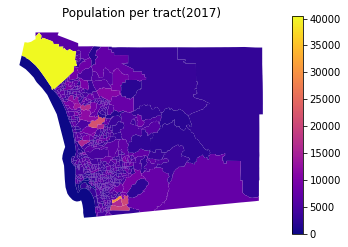

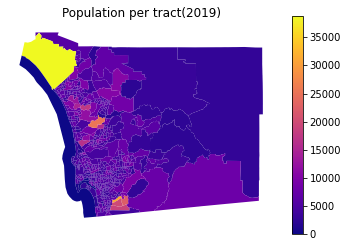

_________________________________________________________________________


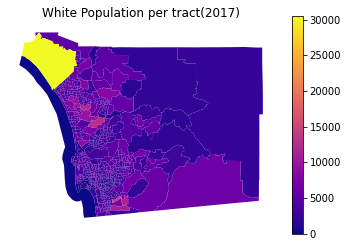

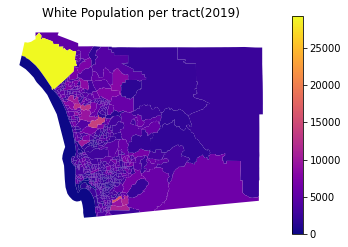

_________________________________________________________________________


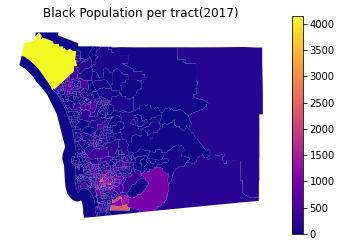

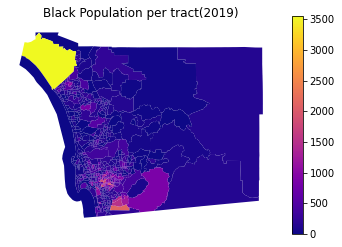

_________________________________________________________________________


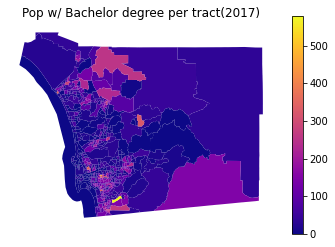

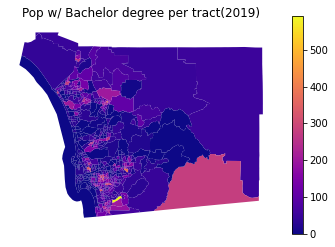

_________________________________________________________________________


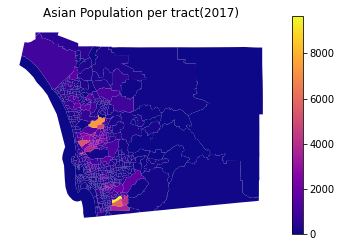

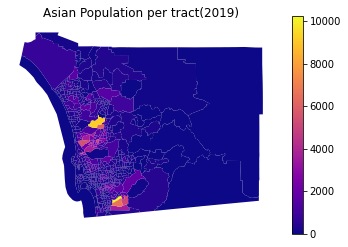

_________________________________________________________________________


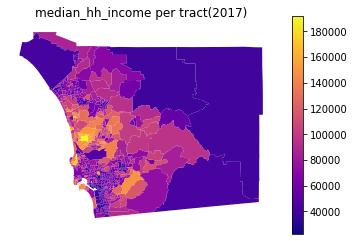

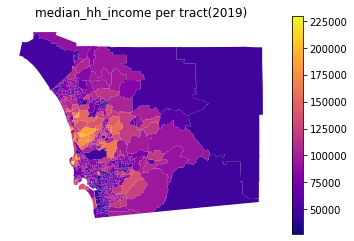

_________________________________________________________________________


In [9]:
###Visualize the data we have looked for in nice colorful maps
for column in variables_dict.keys():
  to_plot = san_diego_csa_2017.dropna(subset = [column], axis = 0)
  to_plot.plot(column, cmap = 'plasma', legend = True)
  plt.title(f'{variables_dict.get(column)} per tract(2017)')
  plt.axis('off')
  plt.show()
  to_plot = san_diego_csa_2019.dropna(subset = [column], axis = 0)
  to_plot.plot(column, cmap = 'plasma', legend = True)
  plt.title(f'{variables_dict.get(column)} per tract(2019)')
  plt.axis('off')
  plt.show()
  print('_________________________________________________________________________')


In [10]:
### Create function to form percentage tables. AKA all rows of the columns in question have values between 0 and 1
def percent_columns(df, columns):
  df_percent = df
  for column in columns[0:5]:
    df_percent[column] = df_percent[column]/sum(df_percent[column])
  return df_percent
sd_2019_percents = percent_columns(san_diego_csa_renamed_2019, list(variables_dict.values()))
sd_2017_percents = percent_columns(san_diego_csa_renamed_2017, list(variables_dict.values()))

In [11]:
sd_2017_percents.head(5)

,GEOID,geometry,Population,White Population,Black Population,Asian Population,Pop w/ Bachelor degree,median_hh_income,NAME,state,county,tract
7,06073000100,"POLYGON ((-13046077.040 3862535.430, -13046055...",0.000872,0.001113,0.000000,0.000211,0.000000,131607.0,"Census Tract 1, San Diego County, California",06,073,000100
238,06073000201,"POLYGON ((-13044291.810 3863180.060, -13044191...",0.000626,0.000808,0.000061,0.000200,0.000000,101071.0,"Census Tract 2.01, San Diego County, California",06,073,000201
155,06073000202,"POLYGON ((-13044868.000 3861599.660, -13044843...",0.001529,0.001822,0.000516,0.001052,0.000000,64080.0,"Census Tract 2.02, San Diego County, California",06,073,000202
77,06073000300,"POLYGON ((-13043153.900 3862030.870, -13043127...",0.001576,0.001894,0.001367,0.000648,0.001101,69766.0,"Census Tract 3, San Diego County, California",06,073,000300
476,06073000400,"POLYGON ((-13043401.250 3863312.430, -13043325...",0.001132,0.001208,0.000516,0.001299,0.000000,69783.0,"Census Tract 4, San Diego County, California",06,073,000400


In [12]:
sd_2019_percents.head(5)

,GEOID,geometry,Population,White Population,Black Population,Asian Population,Pop w/ Bachelor degree,median_hh_income,NAME,state,county,tract
430,06073000100,"POLYGON ((-13046077.040 3862535.430, -13046055...",0.000933,0.001197,0.000000,0.000307,0.000000,138879.0,"Census Tract 1, San Diego County, California",06,073,000100
431,06073000201,"POLYGON ((-13044291.810 3863180.060, -13044191...",0.000570,0.000707,0.000060,0.000190,0.000000,88125.0,"Census Tract 2.01, San Diego County, California",06,073,000201
198,06073000202,"POLYGON ((-13044868.000 3861599.660, -13044843...",0.001370,0.001661,0.000024,0.000960,0.000000,76658.0,"Census Tract 2.02, San Diego County, California",06,073,000202
433,06073000300,"POLYGON ((-13043153.900 3862030.870, -13043127...",0.001580,0.001904,0.001931,0.000426,0.000555,68679.0,"Census Tract 3, San Diego County, California",06,073,000300
348,06073000400,"POLYGON ((-13043401.250 3863312.430, -13043325...",0.001146,0.001196,0.001367,0.001089,0.000000,70267.0,"Census Tract 4, San Diego County, California",06,073,000400


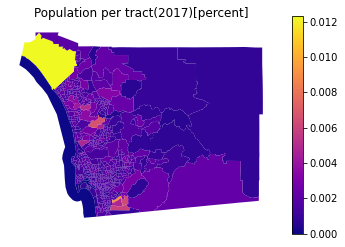

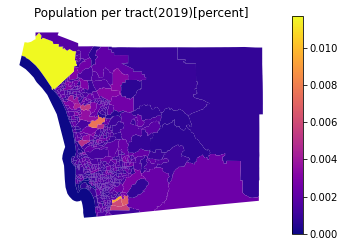

_________________________________________________________________________


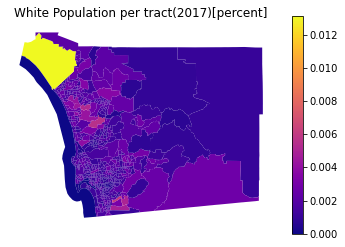

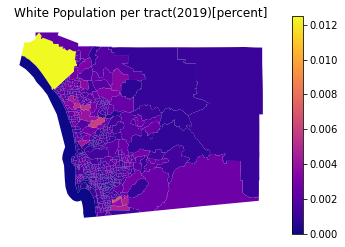

_________________________________________________________________________


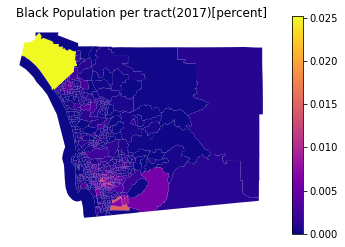

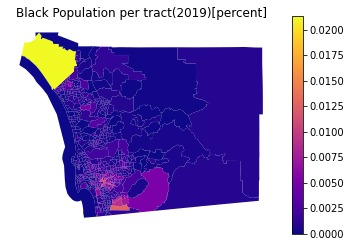

_________________________________________________________________________


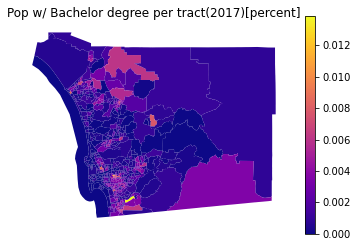

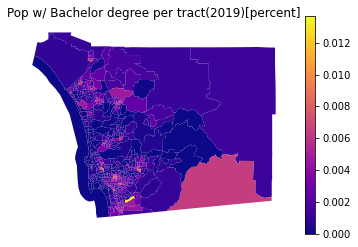

_________________________________________________________________________


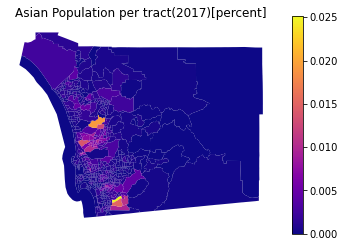

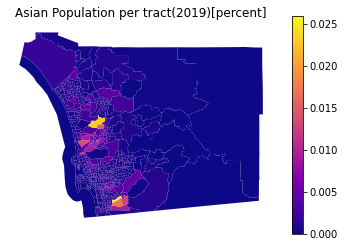

_________________________________________________________________________


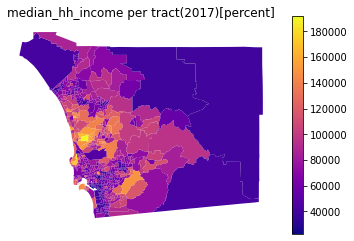

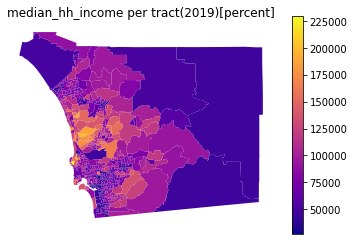

_________________________________________________________________________


In [13]:
for column in variables_dict.values():
  to_plot = sd_2017_percents.dropna(subset = [column], axis = 0)
  to_plot.plot(column, cmap = 'plasma', legend = True)
  plt.title(f'{column} per tract(2017)[percent]')
  plt.axis('off')
  plt.show()
  to_plot = sd_2019_percents.dropna(subset = [column], axis = 0)
  to_plot.plot(column, cmap = 'plasma', legend = True)
  plt.title(f'{column} per tract(2019)[percent]')
  plt.axis('off')
  plt.show()
  print('_________________________________________________________________________')


In [14]:
#describe the percentage tables of the 2017 data
sd_2017_percents.describe()

,Population,White Population,Black Population,Asian Population,Pop w/ Bachelor degree,median_hh_income
count,628.000000,628.000000,628.000000,628.000000,628.000000,621.000000
mean,0.001592,0.001592,0.001592,0.001592,0.001592,75402.798712
std,0.000878,0.000876,0.002172,0.002326,0.001774,30634.533896
min,0.000000,0.000000,0.000000,0.000000,0.000000,22614.000000
25%,0.001122,0.001099,0.000322,0.000351,0.000311,52656.000000
50%,0.001468,0.001450,0.000905,0.000787,0.000981,69792.000000
75%,0.001894,0.001988,0.002061,0.001756,0.002328,92656.000000
max,0.012304,0.013096,0.025168,0.025105,0.013835,191642.000000


In [15]:
#describe the percentage tables of the 2019 data
sd_2019_percents.describe()

,Population,White Population,Black Population,Asian Population,Pop w/ Bachelor degree,median_hh_income
count,628.000000,628.000000,628.000000,628.000000,628.000000,621.000000
mean,0.001592,0.001592,0.001592,0.001592,0.001592,83753.033816
std,0.000899,0.000877,0.002077,0.002424,0.001738,33261.533699
min,0.000000,0.000000,0.000000,0.000000,0.000000,27004.000000
25%,0.001117,0.001106,0.000352,0.000392,0.000341,59643.000000
50%,0.001472,0.001437,0.000864,0.000822,0.001017,79953.000000
75%,0.001887,0.001937,0.001969,0.001716,0.002323,102118.000000
max,0.011687,0.012479,0.021295,0.025885,0.013660,229583.000000


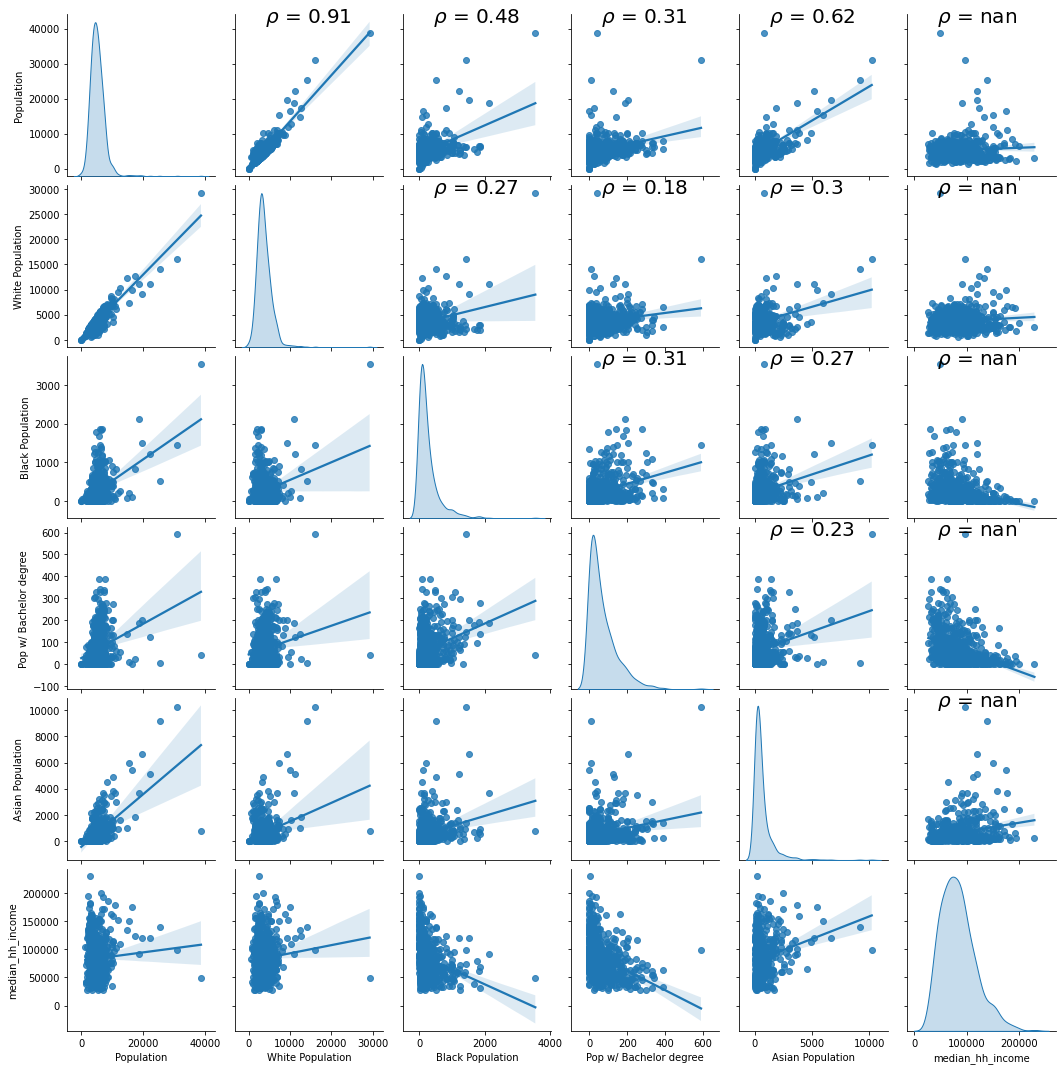

In [50]:
# Create probability density function graphs for each statistic. Will be using the non-percent tables

# for column in variables_dict.values():
#   #do something
cluster_matrix_2019 = san_diego_csa_renamed_2019[variables_dict.values()]
cluster_matrix_2017 = san_diego_csa_renamed_2017[variables_dict.values()]

#Create a function that allows us to visualize all the correlations and the pdf of the varaibles.
def corr(x, y, **kwargs):
  coef = np.corrcoef(x, y)[0][1]
  label = r'$\rho$ = ' + str(round(coef, 2))
  ax = plt.gca()
  ax.annotate(label, xy = (.2, .95), size = 20, xycoords = ax.transAxes)

grid = sns.pairplot(cluster_matrix_2019, kind = 'reg', diag_kind = 'kde')
grid = grid.map_upper(corr)
plt.show()

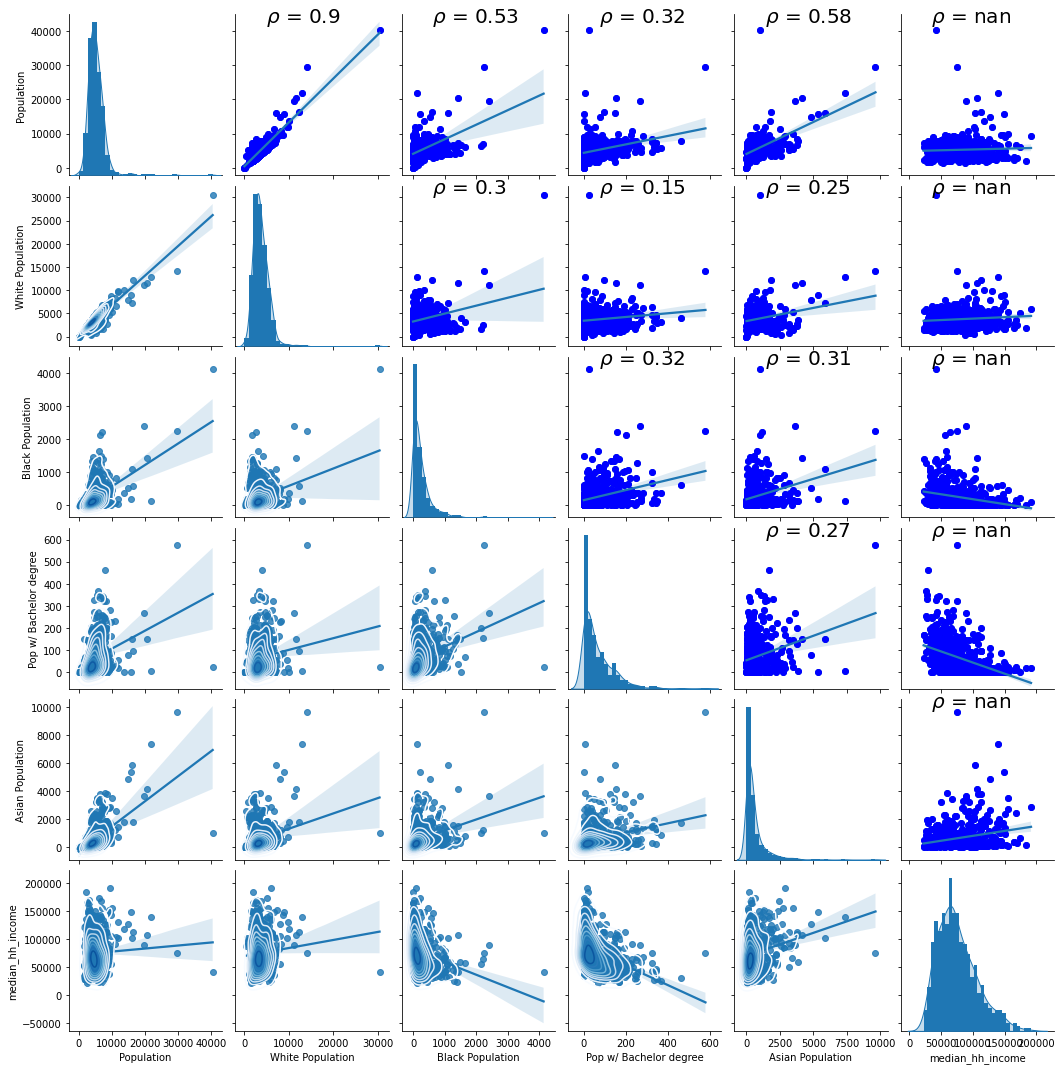

In [51]:
grid = sns.pairplot(cluster_matrix_2017, kind = 'reg', diag_kind = 'kde')
#grid = sns.PairGrid(cluster_matrix_2019)
grid = grid.map_upper(plt.scatter, color = 'blue')
grid = grid.map_lower(sns.kdeplot, cmap = 'Blues')
grid = grid.map_upper(corr)
grid = grid.map_diag(plt.hist, bins = 30, density = True)
#grid = grid.map_diag(sns.distplot, hist = True, kde = True)
plt.show()

#grid = grid.map_lower(sns.kdeplot, cmap = 'Blues')
#grid = grid.map_diag('kde')

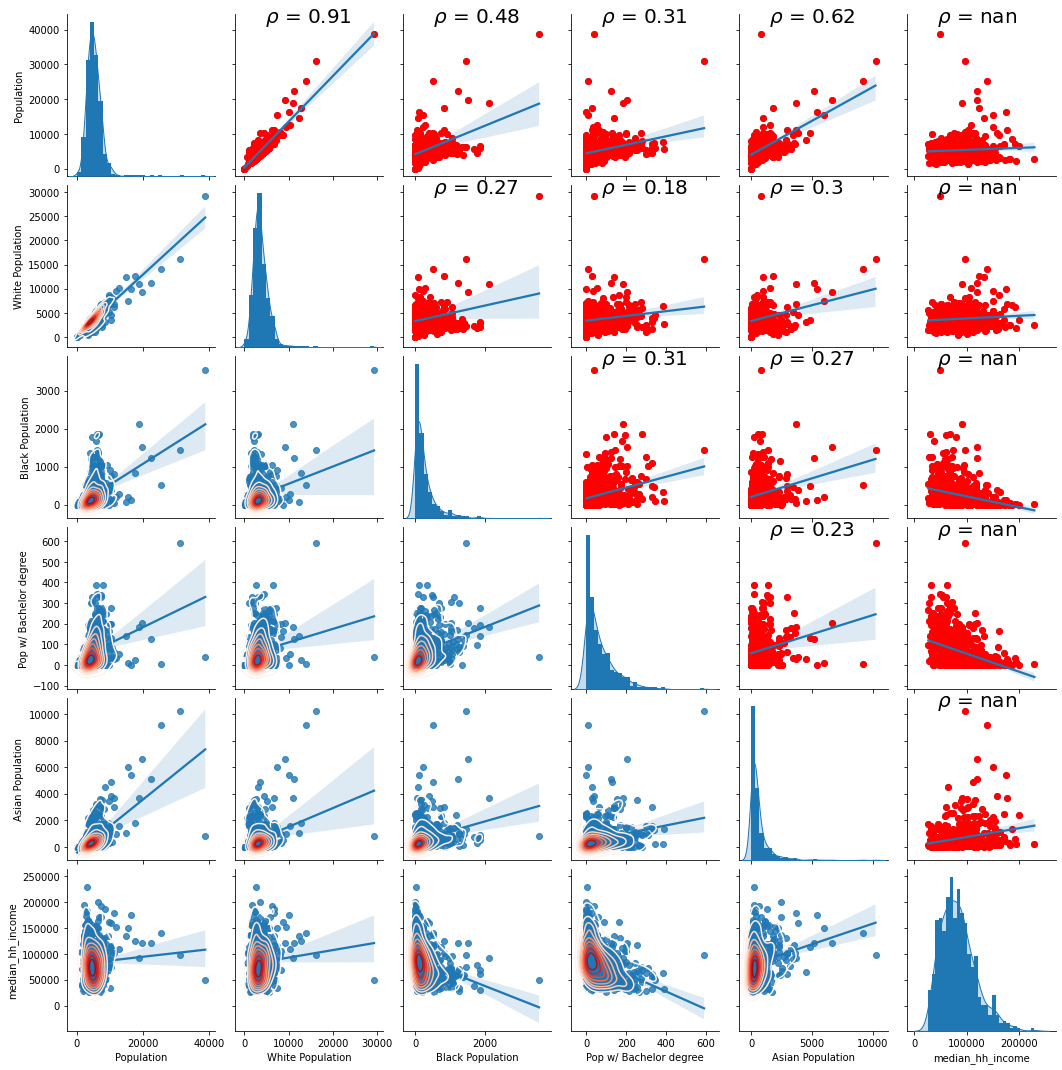

In [52]:

grid = sns.pairplot(cluster_matrix_2019, kind = 'reg', diag_kind = 'kde')
grid = grid.map_upper(plt.scatter, color = 'red')
grid = grid.map_lower(sns.kdeplot, cmap = 'Reds')
grid = grid.map_diag(plt.hist, bins = 30, density = True)
#grid = grid.map_lower(sns.kdeplot, cmap = 'Blues')
#grid = grid.map_diag('kde')
grid = grid.map_upper(corr)
plt.show()

In [53]:
def differences_table(df1, df2, columns):
  diff_df = df1
  diff_df.drop(columns = columns)
  for column in columns:
    diff_df[column] = df1[column] - df2[column]
  return diff_df

In [54]:
differences_df = differences_table(san_diego_csa_renamed_2019, san_diego_csa_renamed_2017, list(variables_dict.values()))

In [55]:
differences_df.head(5)

,GEOID,geometry,Population,White Population,Black Population,Asian Population,Pop w/ Bachelor degree,median_hh_income,NAME,state,county,tract
430,06073000100,"POLYGON ((-13046077.040 3862535.430, -13046055...",-1639.0,-632.0,-211.0,-411.0,-271.0,79969.0,"Census Tract 1, San Diego County, California",06,073,000100
431,06073000201,"POLYGON ((-13044291.810 3863180.060, -13044191...",-1799.0,-870.0,-187.0,-352.0,-60.0,27263.0,"Census Tract 2.01, San Diego County, California",06,073,000201
198,06073000202,"POLYGON ((-13044868.000 3861599.660, -13044843...",-779.0,-159.0,-231.0,209.0,-148.0,20877.0,"Census Tract 2.02, San Diego County, California",06,073,000202
433,06073000300,"POLYGON ((-13043153.900 3862030.870, -13043127...",1177.0,2111.0,-259.0,-158.0,17.0,13338.0,"Census Tract 3, San Diego County, California",06,073,000300
348,06073000400,"POLYGON ((-13043401.250 3863312.430, -13043325...",-1430.0,-770.0,175.0,-599.0,-8.0,-53113.0,"Census Tract 4, San Diego County, California",06,073,000400


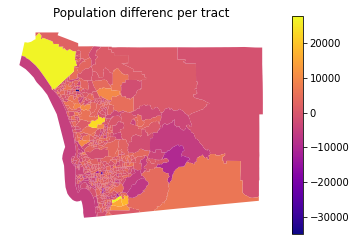

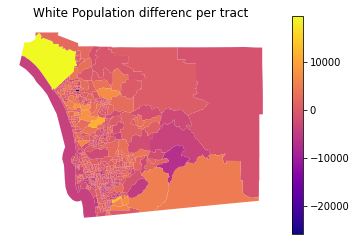

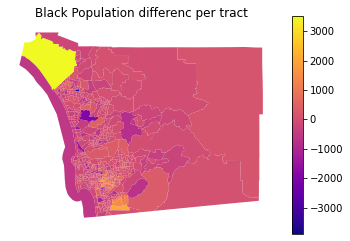

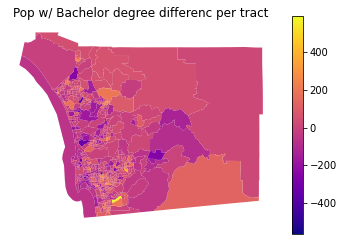

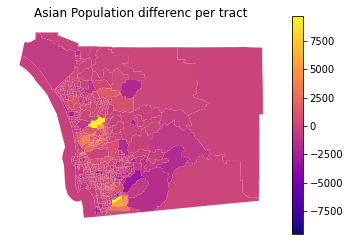

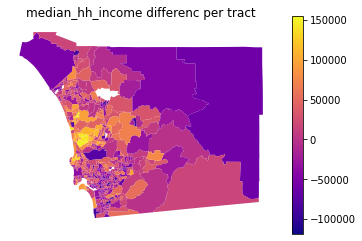

In [58]:
for column in variables_dict.values():
  to_plot = differences_df.dropna(subset = [column], axis = 0)
  to_plot.plot(column, cmap = 'plasma', legend = True)
  plt.title(f'{column} differenc per tract')
  plt.axis('off')
  plt.show()

In [57]:
differences_df.describe()

,Population,White Population,Black Population,Asian Population,Pop w/ Bachelor degree,median_hh_income
count,628.000000,628.000000,628.000000,628.000000,628.000000,614.000000
mean,51.605096,32.218153,3.469745,16.859873,2.367834,8277.382736
std,4160.178536,2840.216442,506.436329,1319.338689,108.364910,45608.249133
min,-34764.000000,-25898.000000,-3881.000000,-9512.000000,-564.000000,-118651.000000
25%,-1737.000000,-1326.250000,-187.000000,-326.500000,-53.250000,-22006.500000
50%,136.000000,84.500000,3.000000,7.500000,2.000000,7047.500000
75%,1949.000000,1452.500000,179.000000,378.750000,57.000000,34989.250000
max,27576.000000,19589.000000,3500.000000,9656.000000,591.000000,154468.000000
